# Comparison of PP and CNO burning

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## a.

We want to plot the energy generation from pp and CNO

Let's write functions to give us the PP and CNO energy generation rates:

In [3]:
def q_pp(X, Z, rho, T):
    T9 = T/1.e9
    return 2.4e4 * rho * X**2 * np.exp(-3.380/T9**(1./3.)) / T9**(2./3.)

In [4]:
def q_cno(X, Z, rho, T):
    T9 = T/1.e9
    return 4.4e25 * rho * X * Z * np.exp(-15.228/T9**(1./3.)) / T9**(2./3.)

In [5]:
rho = 150
T = np.logspace(np.log10(7.5e6), np.log10(5.e7), 100)
X = 0.7
Z = 0.02

Text(0.5, 0, 'T (K)')

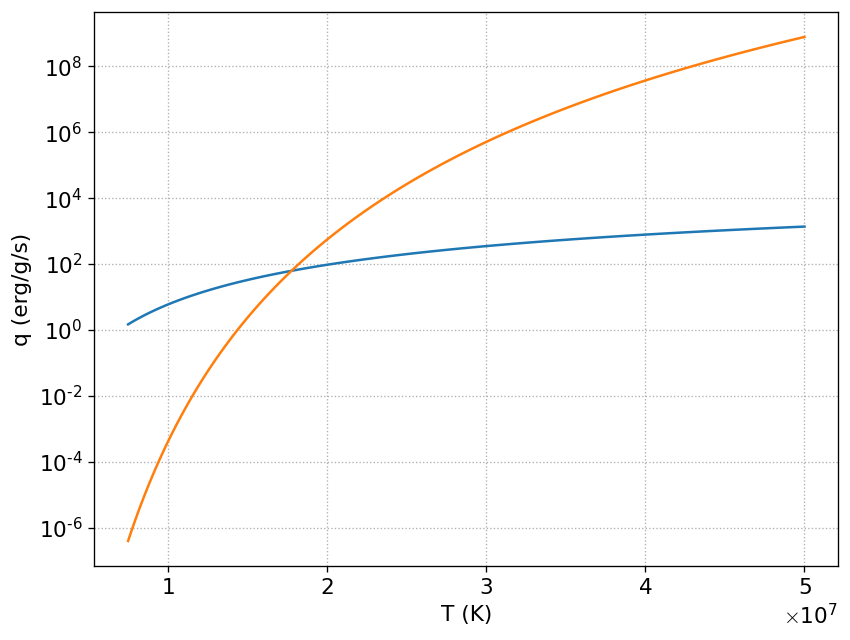

In [6]:
fig, ax = plt.subplots()

ax.plot(T, q_pp(X, Z, rho, T), label="pp chain")
ax.plot(T, q_cno(X, Z, rho, T), label="CNO")

ax.set_yscale("log")
ax.grid(linestyle=":")

ax.set_ylabel("q (erg/g/s)")
ax.set_xlabel("T (K)")

Note that we can also find the temperature where they cross

In [7]:
from scipy.optimize import brentq

In [8]:
T_c = brentq(lambda T: q_pp(X, Z, rho, T) - q_cno(X, Z, rho, T), 1.e7, 2.e7)
T_c

17767321.179752123

## b.

Now we want to find the temperature sensitivities

We'll write a simple function to compute the temperature sensitivity

In [9]:
def T_sensitivity(q_fun, T0, rho=150, X=0.7, Z=0.02):
    """ compute the temperature sensitivity around T = T0"""

    eps = 1.e-8

    q0 = q_fun(X, Z, rho, T0)
    qeps = q_fun(X, Z, rho, T0*(1+eps))

    dlogq_dlogT = (T0/q0)*(qeps - q0)/(T0*eps)

    return dlogq_dlogT

Now for pp, around $T_0 = 2\times 10^7~\mathrm{K}$

In [10]:
T_sensitivity(q_pp, 2.e7)

3.4840087614489295

and CNO, around the same $T_0$

In [11]:
T_sensitivity(q_cno, 2.e7)

18.0334782807262

From this we see that CNO is much more temperature sensitive.